## Streamflow Analysis and Visualizations

### 1. Load the Streamflow Data

In [1]:
# Import necessary modules and the postprocessing library

import sys
import pandas as pd
sys.path.append("../../../")
import glob
from natsort import natsorted


from postprocessinglib.evaluation import data, metrics, visuals
from postprocessinglib.utilities import _helper_functions as hlp

In [2]:
# Define the input path and organize them

folder = r'C:\Users\udenzeU\OneDrive - EC-EC\Fuad_Mesh_Dataset\CanRCM_runs' ## new line
start_dates = [pd.to_datetime('1990-01-01'), pd.to_datetime('2026-01-01'), pd.to_datetime('2071-01-01')]
end_dates = [pd.to_datetime('2010-12-31'), pd.to_datetime('2055-12-31'), pd.to_datetime('2100-12-31')]

# Extract list of CSV files
csv_files = glob.glob(f"{folder}/**/MESH_output_streamflow.csv")
csv_files = natsorted(csv_files)

In [3]:
# Load the Streamflow data using the `generate_dataframes` function 

DATAFRAMES = data.generate_dataframes(csv_fpaths=csv_files)
for key, value in DATAFRAMES.items():
    print(f"{key}")
for key, value in DATAFRAMES.items():
    print(f"{key}:\n{value.head()}")

The start date for the Data is 1990-10-01
DF_1
DF_2
DF_3
DF_4
DF_5
DF_6
DF_OBSERVED
DF_SIMULATED_1
DF_SIMULATED_2
DF_SIMULATED_3
DF_SIMULATED_4
DF_SIMULATED_5
DF_SIMULATED_6
DF_MERGED
DF_1:
            QOMEAS1    QOSIM1  QOMEAS2    QOSIM2  QOMEAS3    QOSIM3  QOMEAS4  \
1990-10-01     10.6  18.81220      NaN  2.017267    0.593  0.471522     7.70   
1990-10-02     10.8  18.51336      NaN  1.686926    0.777  0.466355     8.11   
1990-10-03     11.1  18.35229      NaN  1.599513    0.697  0.426448     7.74   
1990-10-04     11.0  18.30125      NaN  1.680425    0.668  0.385862     7.43   
1990-10-05     26.8  18.06379      NaN  1.764025    0.627  0.335419     8.07   

              QOSIM4  QOMEAS5    QOSIM5  ...  QOMEAS50   QOSIM50  QOMEAS51  \
1990-10-01  39.71715     2.89  5.233493  ...       NaN  0.067004     0.129   
1990-10-02  36.69350     2.93  4.991893  ...       NaN  0.073589     0.150   
1990-10-03  34.88419     2.70  4.767472  ...       NaN  0.079277     0.197   
1990-10-04  34.04

### 2. Process and Aggregate the Data

In [4]:
merged = DATAFRAMES["DF_MERGED"]
print(merged.head(10)) # Let's see what is looks like

# Use the long term seasonal aggregation to aggregate the data by time period into a single year time period

lt_mean_1990_2010 = data.long_term_seasonal(merged.loc[start_dates[0]: end_dates[0]], 'mean')
print(lt_mean_1990_2010)

lt_mean_2026_2055 = data.long_term_seasonal(merged.loc[start_dates[1]: end_dates[1]], 'mean')
print(lt_mean_2026_2055)

lt_mean_2071_2100 = data.long_term_seasonal(merged.loc[start_dates[2]: end_dates[2]], 'mean')
print(lt_mean_2071_2100)

           Station1                                                    \
             QOMEAS    QOSIM1    QOSIM2    QOSIM3    QOSIM4    QOSIM5   
1990-10-01     10.6  18.81220  18.82299  18.81733  18.81468  18.81892   
1990-10-02     10.8  18.51336  18.72746  18.51571  18.63782  18.67601   
1990-10-03     11.1  18.35229  18.70900  18.28233  18.49831  18.67621   
1990-10-04     11.0  18.30125  18.75058  18.00542  18.10607  18.62771   
1990-10-05     26.8  18.06379  18.57560  17.74772  17.75610  18.33330   
1990-10-06     32.3  17.88546  18.19083  17.55242  17.61585  18.02880   
1990-10-07     22.2  17.70854  17.74622  17.48413  17.53787  17.93426   
1990-10-08     19.1  17.61584  17.50106  17.49782  17.37719  17.75793   
1990-10-09     18.0  17.60339  17.38908  17.56804  17.27410  17.53244   
1990-10-10     18.7  17.58252  17.30749  17.56341  17.18378  17.33812   

                     Station2                      ... Station53            \
              QOSIM6   QOMEAS    QOSIM1    QO

       Station1                                                         \
         QOMEAS     QOSIM1     QOSIM2     QOSIM3     QOSIM4     QOSIM5   
jday                                                                     
1      9.497436  11.581862  10.354240   9.274994  12.612843  11.710418   
2      9.467179  11.296332  10.332833   9.328039  12.760337  11.282132   
3      9.518974  11.058306  10.452156   9.151275  12.247396  10.917497   
4      9.554872  11.146149  10.342944   9.065909  11.804737  10.587664   
5      9.501026  11.100729  10.447961   8.979059  11.923177  10.362997   
...         ...        ...        ...        ...        ...        ...   
362   10.680750  12.756324  11.683511   9.688269  12.870923  11.329784   
363   10.861500  12.530487  11.239175   9.806731  12.567685  11.026859   
364   10.468750  12.353217  10.676666   9.538857  12.259529  10.966772   
365   10.152250  12.044333  10.442994   9.391621  12.291368  11.508266   
366   10.871000  10.502868  11.166293 

In [5]:
# Use the statistics aggregation to aggregate the multiple model simulations into maximum, median and minimum values per time period per station

min_1990_2010     = data.stat_aggregate(lt_mean_1990_2010, 'min')
max_1990_2010     = data.stat_aggregate(lt_mean_1990_2010, 'max')
median_1990_2010  = data.stat_aggregate(lt_mean_1990_2010, 'median')
# Let's see what this looks like
print(min_1990_2010)
print(max_1990_2010)
print(median_1990_2010)

# We do the same thing for the other time periods
min_2026_2055     = data.stat_aggregate(lt_mean_2026_2055, 'min')
max_2026_2055     = data.stat_aggregate(lt_mean_2026_2055, 'max')
median_2026_2055  = data.stat_aggregate(lt_mean_2026_2055, 'median')

min_2071_2100     = data.stat_aggregate(lt_mean_2071_2100, 'min')
max_2071_2100     = data.stat_aggregate(lt_mean_2071_2100, 'max')
median_2071_2100  = data.stat_aggregate(lt_mean_2071_2100, 'median')

      Station1  Station2  Station3   Station4  Station5   Station6  Station7  \
           MIN       MIN       MIN        MIN       MIN        MIN       MIN   
jday                                                                           
1     6.329358  0.433963  0.005967  13.416614  2.642453  13.954072  0.000863   
2     6.272638  0.430830  0.005810  13.317578  2.630690  13.851633  0.000828   
3     6.214155  0.427641  0.005658  13.215868  2.617990  13.745751  0.000795   
4     6.157008  0.424554  0.005513  13.112881  2.605905  13.629465  0.000764   
5     6.098863  0.421523  0.005376  13.033418  2.588094  13.516563  0.000932   
...        ...       ...       ...        ...       ...        ...       ...   
362   6.559302  0.448137  0.006684  13.820552  2.752976  14.424254  0.001061   
363   6.503955  0.444373  0.006527  13.670305  2.704638  14.293511  0.001014   
364   6.445303  0.440619  0.006405  13.547787  2.660635  14.175765  0.000970   
365   6.396284  0.437201  0.006232  13.5

### 3. Visualize the Streamflow data

In [6]:
# Extract the stations you want to plot 
stations = ["Station6", "Station20", "Station27", "Station33", "Station46"]

# Because we have 3 time periods, let us write the lines and bounds into lists so its easier to follow
lines_to_plot = [median_1990_2010.loc[:, median_1990_2010.columns.map(lambda x: x[0] in stations and x[1] == "MEDIAN")],
                 median_2026_2055.loc[:, median_1990_2010.columns.map(lambda x: x[0] in stations and x[1] == "MEDIAN")],
                 median_2071_2100.loc[:, median_1990_2010.columns.map(lambda x: x[0] in stations and x[1] == "MEDIAN")]]

# and now for the bounds
#upper
ubounds_list = [max_1990_2010.loc[:, max_1990_2010.columns.map(lambda x: x[0] in stations and x[1] == "MAX")],
                max_2026_2055.loc[:, max_1990_2010.columns.map(lambda x: x[0] in stations and x[1] == "MAX")],
                max_2071_2100.loc[:, max_1990_2010.columns.map(lambda x: x[0] in stations and x[1] == "MAX")]]
#lower
lbounds_list = [min_1990_2010.loc[:, min_1990_2010.columns.map(lambda x: x[0] in stations and x[1] == "MIN")],
                min_2026_2055.loc[:, min_1990_2010.columns.map(lambda x: x[0] in stations and x[1] == "MIN")],
                min_2071_2100.loc[:, min_1990_2010.columns.map(lambda x: x[0] in stations and x[1] == "MIN")]]

Number of linestyles provided is less than the minimum required. Number of Lines : 3. Number of linestyles provided is:  1. Defaulting to solid lines (-)


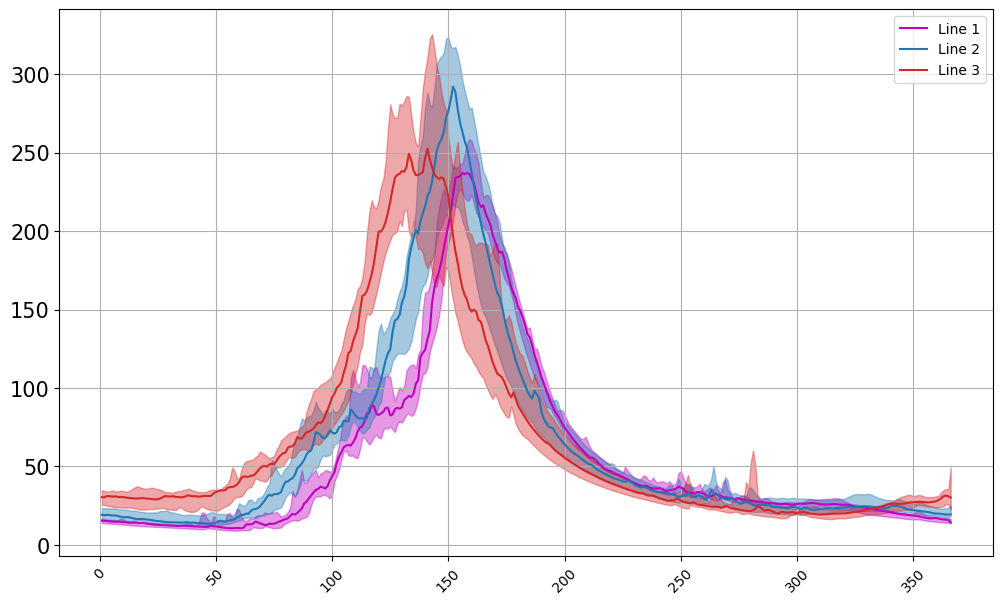

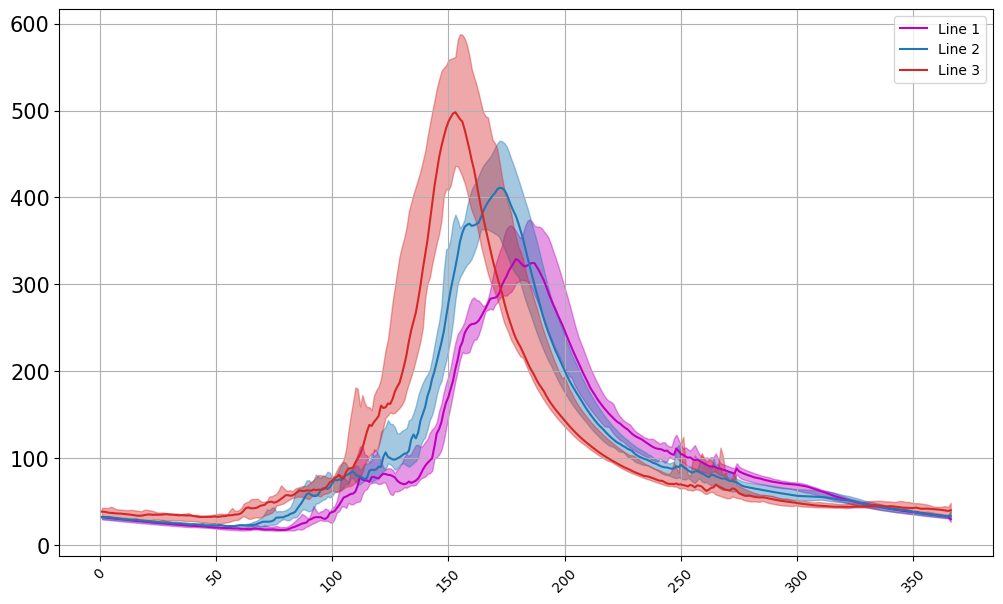

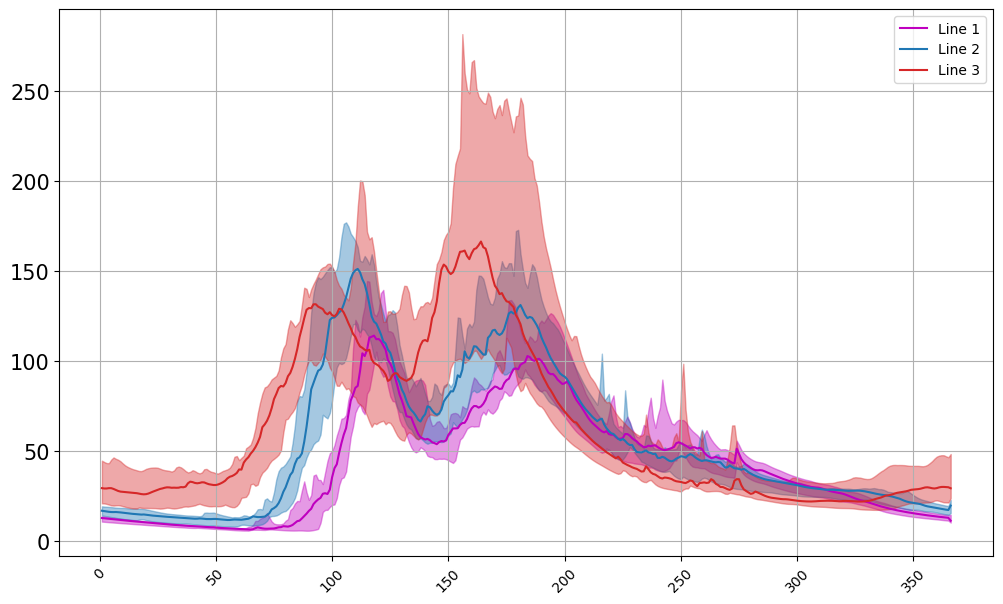

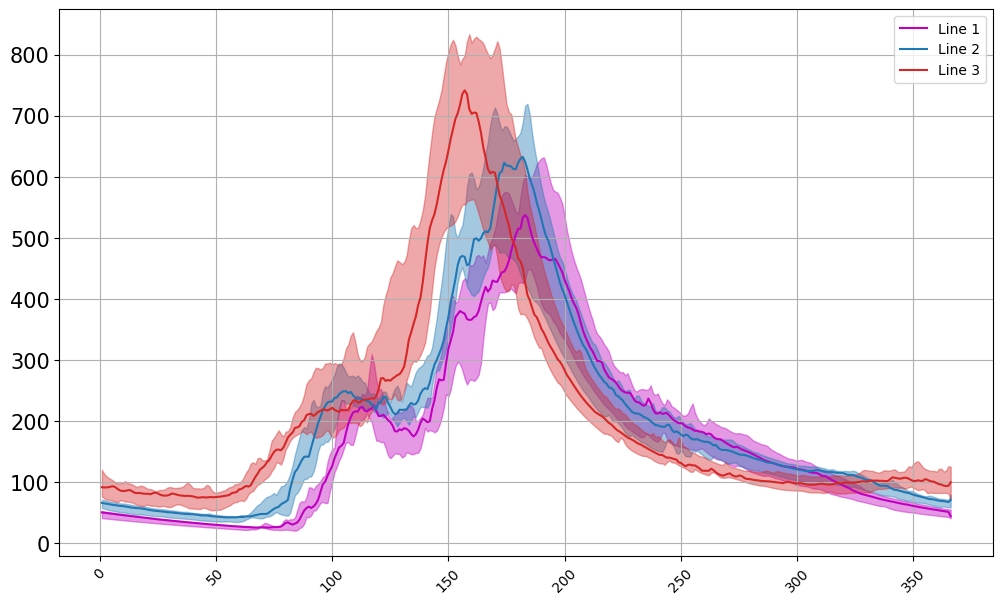

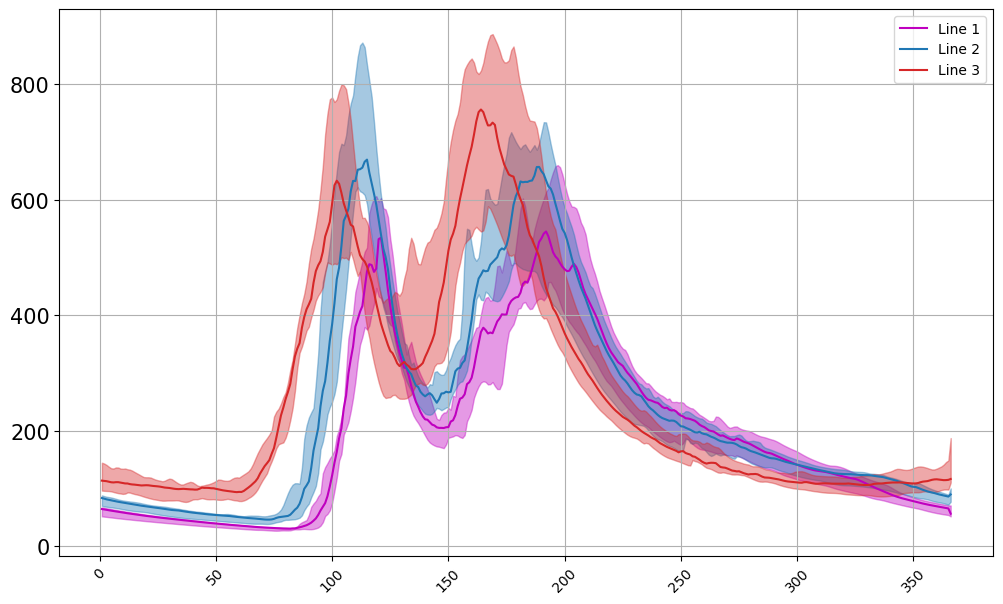

In [7]:
# Now that we have extracted out lines and bounds, let us plot the graps using the bounded plot function
visuals.bounded_plot(
    lines = lines_to_plot, 
    upper_bounds = ubounds_list,
    lower_bounds = lbounds_list,
    grid=True,
)

# The function has a bunch of default colors, transparencies and legends, thus we can infact
# run test visuals without having to specify all the details 

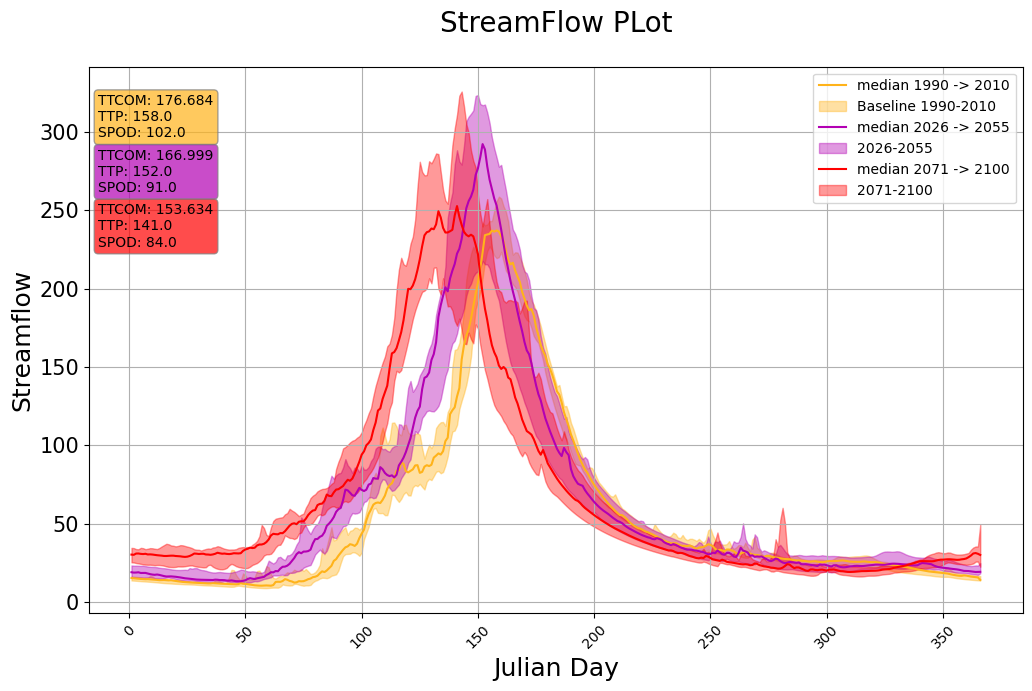

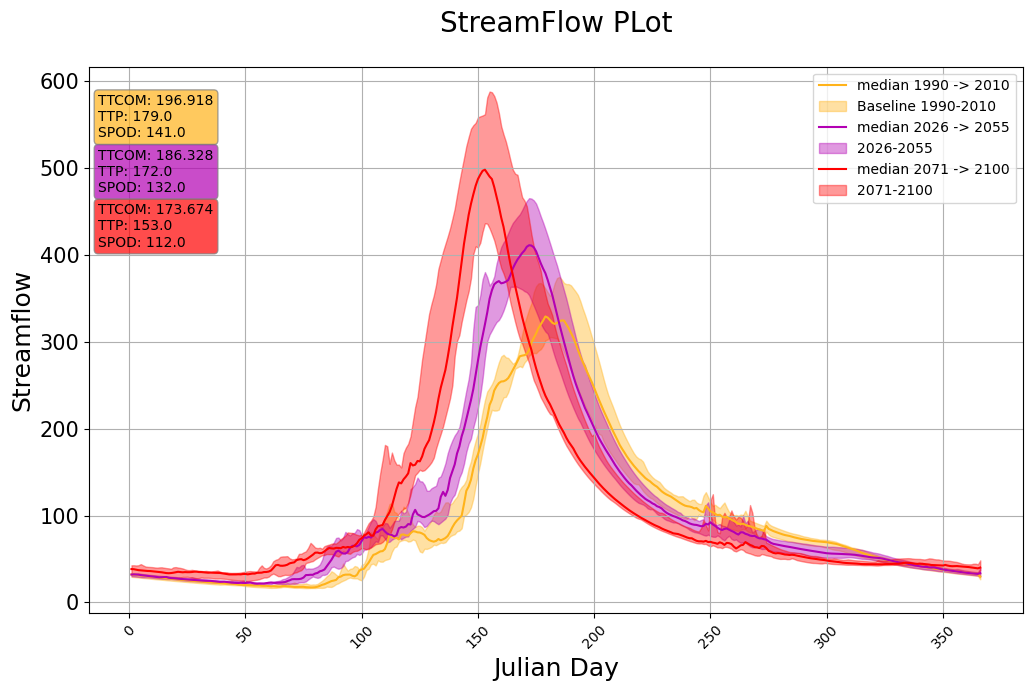

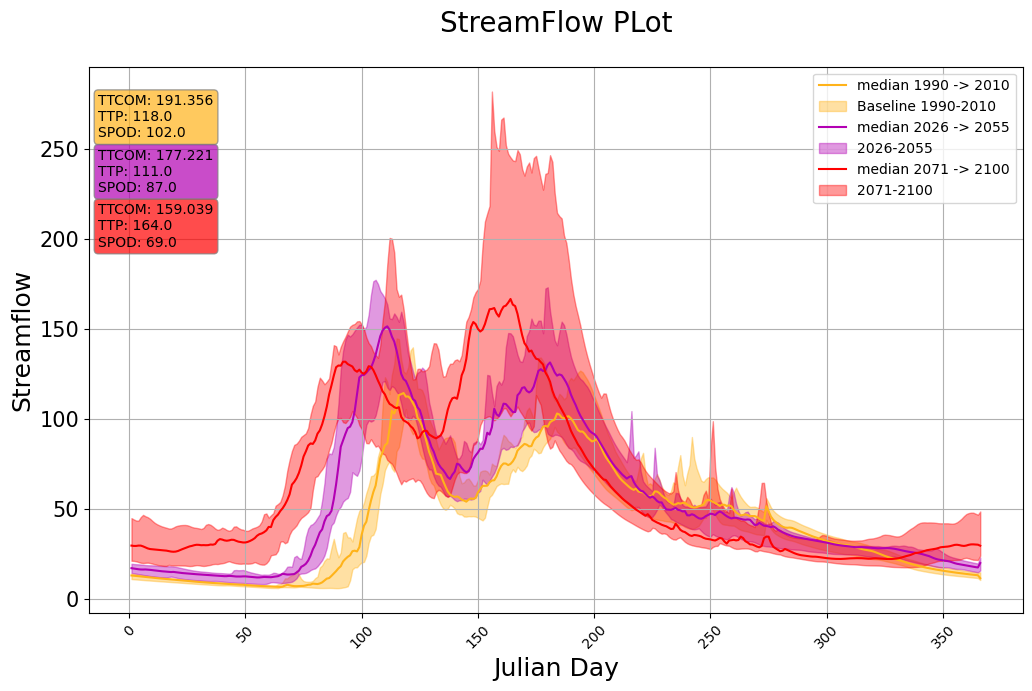

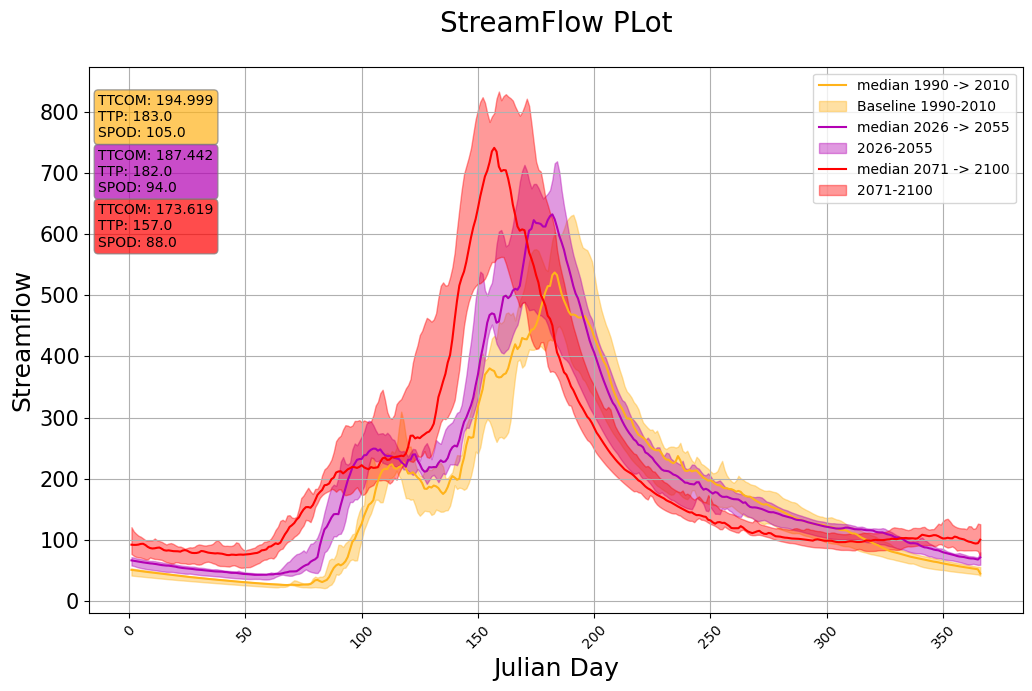

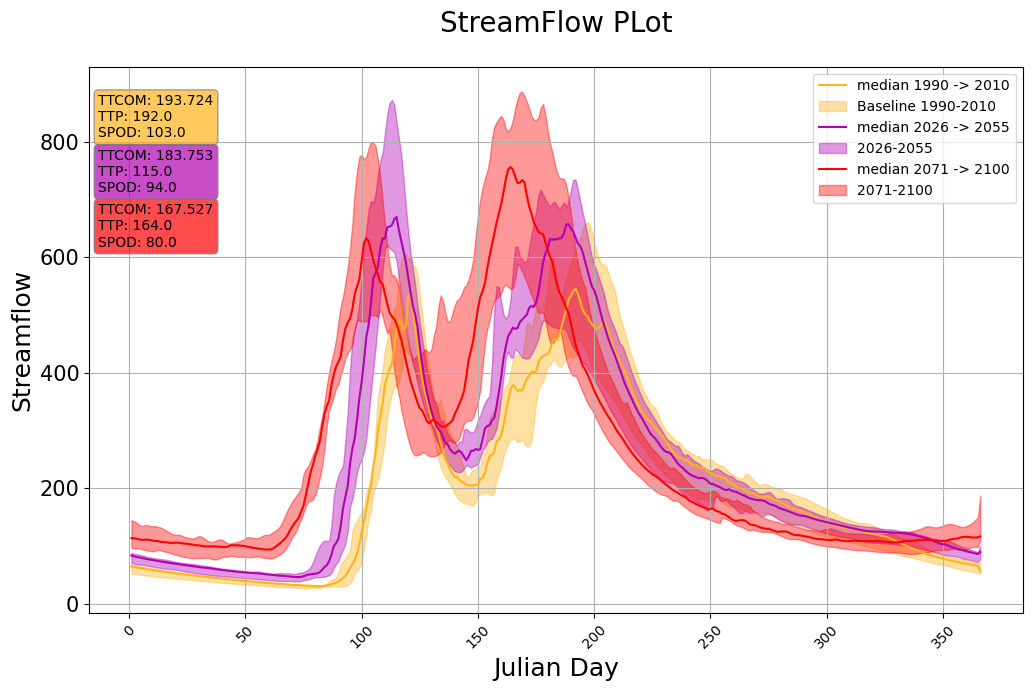

In [11]:
# Plain, simple and not a lot of Customizations. Lets change that.
# Lets add color, titles, labels, legends and display a few metrics

visuals.bounded_plot(
    lines = lines_to_plot, 
    upper_bounds = ubounds_list,
    lower_bounds = lbounds_list,
    linestyles=['(1.00, 0.70, 0.10)-', '(0.70, 0.00, 0.70)-', '(1.00, 0.00, 0.00)-'],
    labels=['Julian Day', 'Streamflow'],
    legend = ["median 1990 -> 2010", "median 2026 -> 2055", "median 2071 -> 2100"],
    bound_legend=["Baseline 1990-2010", "2026-2055", "2071-2100"],
    metrices= ["TTCOM", "TTP", "SPOD"],
    grid=True,
    transparency = [0.4],
    title = 'Streamflow PLot'
)